In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split #input of X, y and outputs x_train, x_test, y_train, y_test
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [2]:
df = pd.read_csv('diamonds.csv')

In [3]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## Data Description:

### The Diamond dataset contains information about diamonds, including their physical attributes and prices. The key features in the dataset are:
- Carat: The weight of the diamond.
- Cut: The quality of the diamond cut (e.g., Fair, Good, Very Good, Premium, Ideal).
- Color: The color grade of the diamond, with letters indicating the quality (e.g., D (best), E, F, ..., J (worst)).
- Clarity: The clarity grade of the diamond (e.g., I1 (worst), SI1, SI2, VS1, VS2, VVS1, VVS2, IF (best)).
- Depth: The total depth percentage of the diamond.
- Table: The width of the diamond's top as a percentage of its widest point.
- Price: The price of the diamond in US dollars.
- X: Length of the diamond in mm.
- Y: Width of the diamond in mm.
- Z: Depth of the diamond in mm.


## Understand the Data:

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.shape

(53940, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Define the Problem Statement:
### - Understand how different characteristics of a diamond (carat, cut, color, clarity, depth, table, dimensions x/y/z) influence its price, and identify key patterns and relationships.

## Data Cleaning and Manipulation:

In [8]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(146)

In [10]:
df = df.drop_duplicates()

In [11]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## Identify Data Types:

In [12]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

- Continous Numerical : carat, depth, table, price, x, y, z
- Ordinal Categorical : cut, color, clarity

## Formulate Analysis Questions:

- How does carat affect price?

- Do better cuts/colors/clarity lead to higher prices?

- Which numeric variables are most correlated with price?

- Are there any outliers or unrealistic values in dimensions (x, y, z)?

## Visualization:

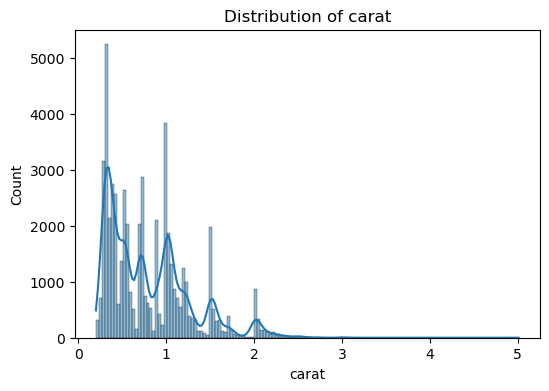

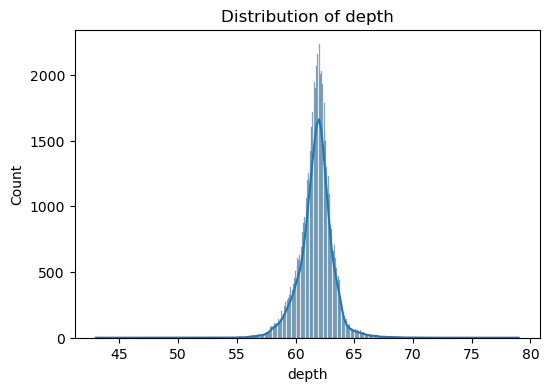

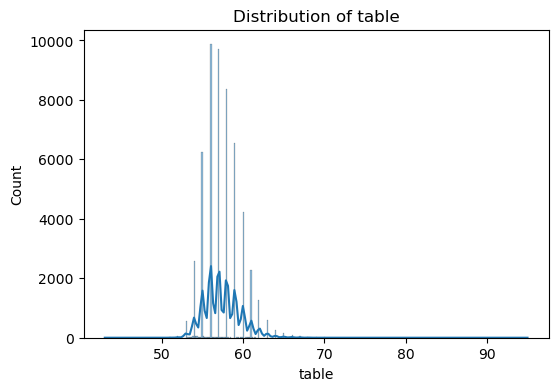

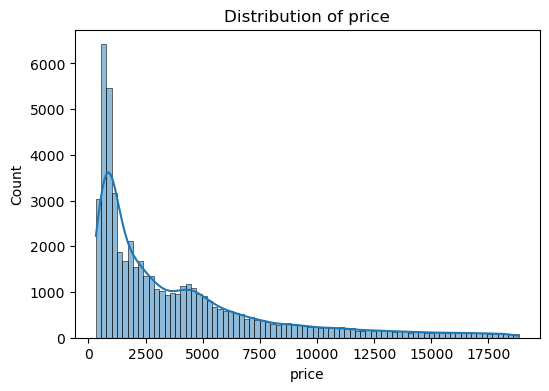

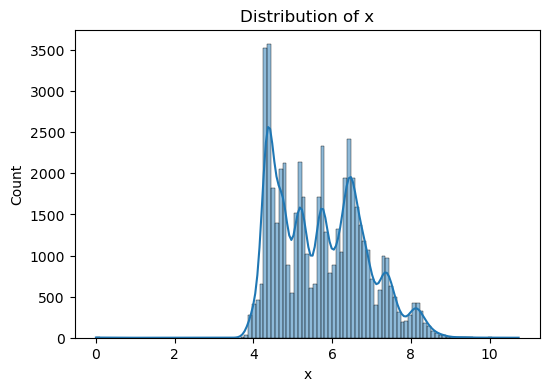

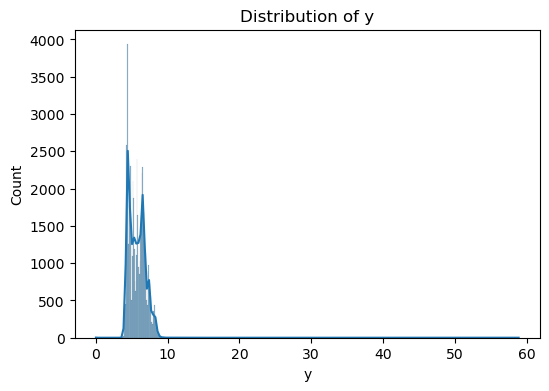

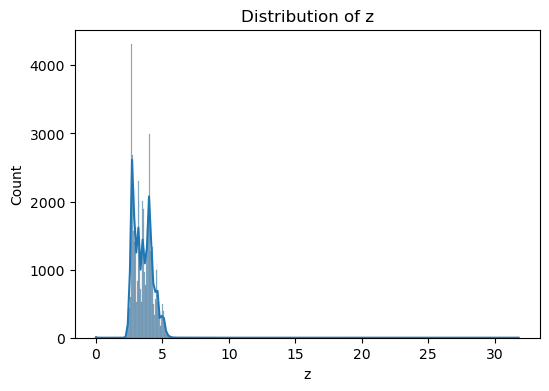

In [13]:
num_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
for col in num_cols:      # Numerical Columns
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

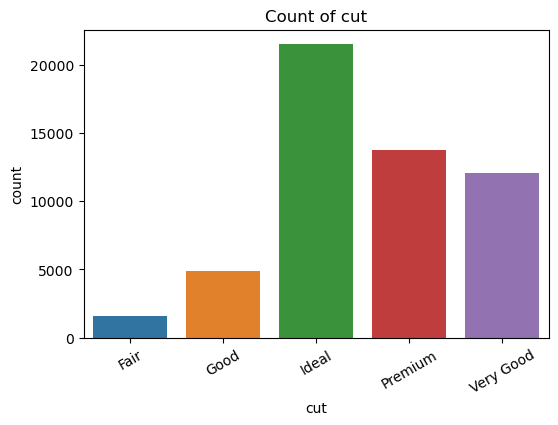

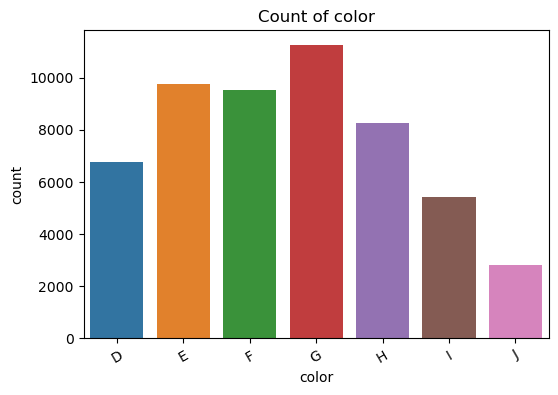

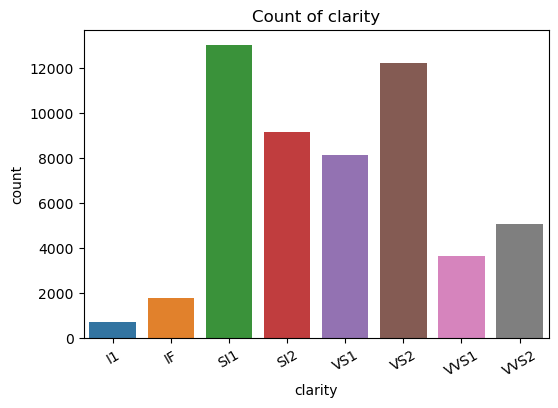

In [14]:
cat_cols = ['cut', 'color', 'clarity']
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df,order=sorted(df[col].unique()))
    plt.title(f'Count of {col}')
    plt.xticks(rotation=30)
    plt.show()

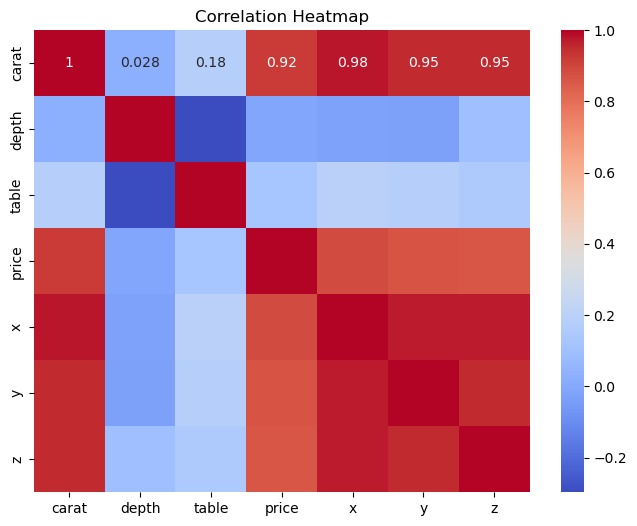

In [15]:
corr = df[['carat','depth','table','price','x','y','z']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

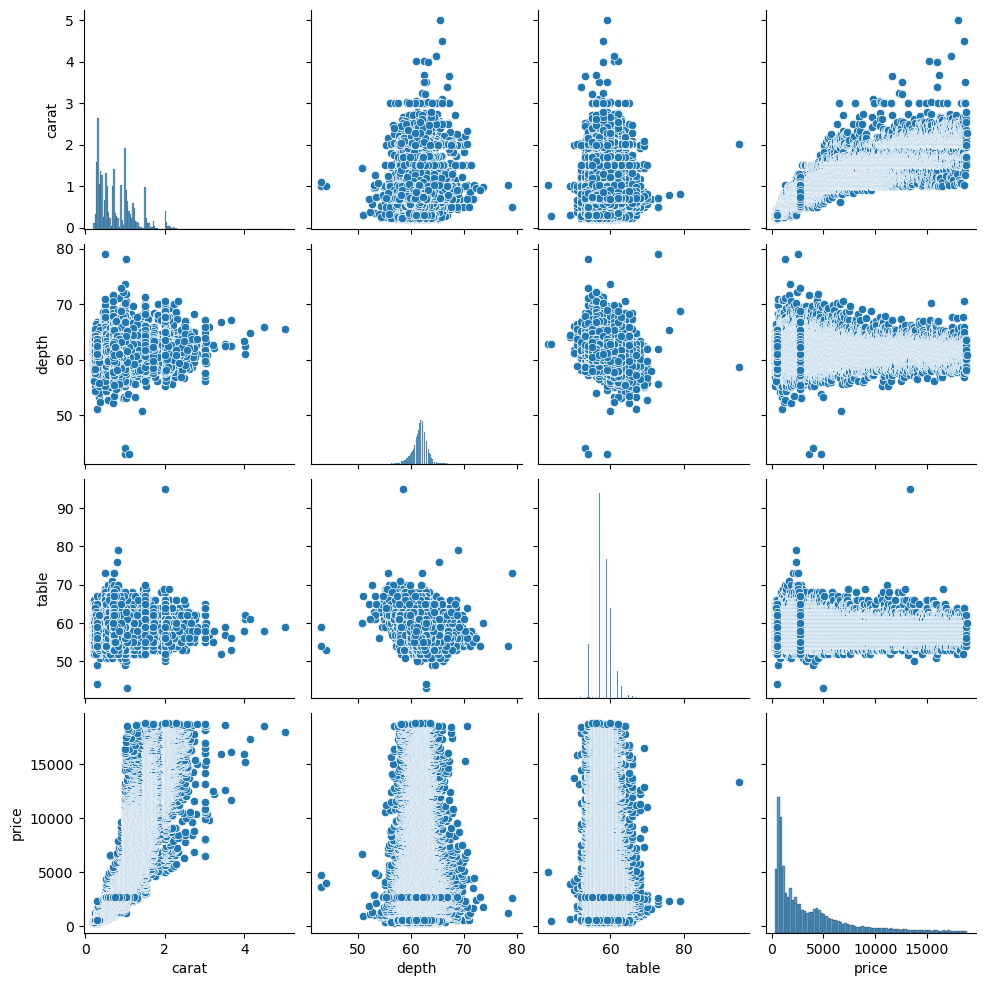

In [16]:
sns.pairplot(df[['carat','depth','table','price']])

## Preprocessing : 

In [17]:
# Split the dataset into training and testing sets.

X = df.drop('price', axis=1)
y = df['price']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
X_train.shape

(43035, 9)

In [20]:
X_test.shape

(10759, 9)

## Outliers

In [21]:
numeric_cols = df.select_dtypes(include=['number']).columns

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1


outliers = pd.DataFrame(index=df.index, columns=numeric_cols)
for col in numeric_cols:
    outliers[col] = (df[col] < (Q1[col] - 1.5 * IQR[col])) | (df[col] > (Q3[col] + 1.5 * IQR[col]))


outliers.sum()

carat    1873
depth    2525
table     604
price    3523
x          31
y          28
z          48
dtype: int64

## Encoding : 

In [22]:
X_train = pd.get_dummies(X_train,drop_first = True) # it do one-hot encoding

In [23]:
X_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
33544,0.35,62.0,55.0,4.47,4.53,2.79,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
26752,2.21,62.0,57.0,8.36,8.31,5.18,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
45914,0.53,60.0,57.0,5.24,5.30,3.16,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3071,0.80,61.7,58.0,5.96,5.93,3.67,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
43829,0.41,61.5,56.0,4.81,4.82,2.96,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False


In [24]:
# bool to int conversion
bool_cols = X_train.select_dtypes(include = 'bool').columns
bool_cols

Index(['cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [25]:
X_train[bool_cols] = X_train[bool_cols].astype(int) # Conversion from bool to int
X_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
33544,0.35,62.0,55.0,4.47,4.53,2.79,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
26752,2.21,62.0,57.0,8.36,8.31,5.18,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
45914,0.53,60.0,57.0,5.24,5.30,3.16,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3071,0.80,61.7,58.0,5.96,5.93,3.67,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
43829,0.41,61.5,56.0,4.81,4.82,2.96,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43035 entries, 33544 to 15832
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          43035 non-null  float64
 1   depth          43035 non-null  float64
 2   table          43035 non-null  float64
 3   x              43035 non-null  float64
 4   y              43035 non-null  float64
 5   z              43035 non-null  float64
 6   cut_Good       43035 non-null  int64  
 7   cut_Ideal      43035 non-null  int64  
 8   cut_Premium    43035 non-null  int64  
 9   cut_Very Good  43035 non-null  int64  
 10  color_E        43035 non-null  int64  
 11  color_F        43035 non-null  int64  
 12  color_G        43035 non-null  int64  
 13  color_H        43035 non-null  int64  
 14  color_I        43035 non-null  int64  
 15  color_J        43035 non-null  int64  
 16  clarity_IF     43035 non-null  int64  
 17  clarity_SI1    43035 non-null  int64  
 18  clarity

In [27]:
X_test = pd.get_dummies(X_test,drop_first = True)
X_test.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
43657,0.71,64.9,54.0,5.63,5.53,3.62,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
4274,0.90,61.0,59.0,6.14,6.18,3.76,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
47412,0.57,62.1,56.0,5.30,5.33,3.30,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
44437,0.51,62.5,60.0,5.08,5.10,3.18,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
13975,1.19,62.3,55.0,6.80,6.82,4.24,False,True,False,False,...,False,True,False,False,True,False,False,False,False,False


In [28]:
bool_cols = X_test.select_dtypes(include = 'bool').columns
bool_cols

Index(['cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [29]:
X_test[bool_cols] = X_test[bool_cols].astype(int)  #Conversion from bool to int
X_test.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
43657,0.71,64.9,54.0,5.63,5.53,3.62,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4274,0.90,61.0,59.0,6.14,6.18,3.76,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
47412,0.57,62.1,56.0,5.30,5.33,3.30,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
44437,0.51,62.5,60.0,5.08,5.10,3.18,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
13975,1.19,62.3,55.0,6.80,6.82,4.24,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0


## Model Development : 

In [30]:
# Models that work for this problems ?
#- Linear regression
#- KNN regression
#- Decision Tree Regression
#- Random Forest regression

#### Linear regression

In [31]:
regression_model = LinearRegression() #initialization
regression_model.fit(X_train,y_train)
y_pred = regression_model.predict(X_test)
y_pred # predicted price of diamonds in x_test

array([  700.07217051,  3754.66272195,  2630.13669808, ...,
        1396.6899335 , 11298.58750591,  1483.7827687 ])

In [32]:
y_test

43657     1435
4274      3584
47412     1851
44437     1590
13975     5690
         ...  
41789     1249
43542     1428
35783      912
25885    15002
39329     1071
Name: price, Length: 10759, dtype: int64

In [33]:
# Model Evaluation for regression model

In [34]:
mean_absolute_error(y_test,y_pred)

725.2703212681342

In [35]:
mean_squared_error(y_test,y_pred)

1215093.9038325055

In [36]:
root_mean_squared_error(y_test,y_pred)

1102.31297907287

In [37]:
r2_score(y_test,y_pred)

0.9202802581013377

#### Random Forest Regression

In [38]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
y_pred

array([ 1682.3775,  3701.435 ,  1867.87  , ...,   879.32  , 15194.27  ,
        1085.15  ])

In [39]:
y_test

43657     1435
4274      3584
47412     1851
44437     1590
13975     5690
         ...  
41789     1249
43542     1428
35783      912
25885    15002
39329     1071
Name: price, Length: 10759, dtype: int64

In [40]:
# Model Evaluation for RandomForestRegressor model

In [41]:
mean_absolute_error(y_test,y_pred)

284.1985940928746

In [42]:
mean_squared_error(y_test,y_pred)

347780.13169741567

In [43]:
root_mean_squared_error(y_test,y_pred)

589.7288628661613

In [44]:
r2_score(y_test,y_pred)

0.9771828808876796

#### Decision Tree Regression

In [45]:
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train,y_train)
y_pred = DecisionTree_model.predict(X_test)
y_pred

array([ 1826.,  3740.,  1868., ...,   867., 16921.,   835.])

In [46]:
y_test

43657     1435
4274      3584
47412     1851
44437     1590
13975     5690
         ...  
41789     1249
43542     1428
35783      912
25885    15002
39329     1071
Name: price, Length: 10759, dtype: int64

In [47]:
# Model Evaluation for DecisionTreeRegressor model

In [48]:
mean_absolute_error(y_test,y_pred)

378.73747560182176

In [49]:
mean_squared_error(y_test,y_pred)

710692.0802351519

In [50]:
root_mean_squared_error(y_test,y_pred)

843.0255513536656

In [51]:
r2_score(y_test,y_pred)

0.9533729952663976